# Прогнозирование оттока пользователей для телекоммуникационной компании 

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

`Partner` – состоит ли клиент в браке (Yes, No)<br>
 `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
`PaperlessBilling` – пользуется ли клиент безбумажным биллингом

# 1. Описание данных

In [19]:
# Импорт основных библиотек
import numpy as np
import pandas as pd
import math
from scipy.stats import kendalltau
# Импорт библиотек построения графиков и диаграмм
from matplotlib import pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default='notebook'

# Указание режима отображения диаграмм
%matplotlib inline

# Импорт основных библиотек машинного обучения
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import MinMaxScaler

# Импорт библиотек моделей машинного обучения
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Импорт библиотек отбора признаков
from sklearn.feature_selection import RFE

# Импорт библиотек оценки моделей машинного обучения
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
# Загрузка исходных данных
df = pd.read_csv('telecom_users.csv', index_col=0, skipinitialspace=True)

In [29]:
# просмотр информации о таблице
df.info()
# просмотр таблицы 
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5986 entries, 1869 to 860
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
1869  7010-BRBUU    Male              0     Yes        Yes      72   
4528  9688-YGXVR  Female              0      No         No      44   
6344  9286-DOJGF  Female              1     Yes         No      38   
6739  6994-KERXL    Male              0      No         No       4   
432   2181-UAESM    Male              0      No         No       2   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
1869          Yes           Yes              No  No internet service  ...   
4528          Yes            No     Fiber optic                   No  ...   
6344          Yes           Yes     Fiber optic                   No  ...   
6739          Yes            No             DSL                   No  ...   
432           Yes            No             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
1869  No internet service  No internet service  No internet service   
4528                  Yes                   No                  Yes   
6344                   No                   No                   No   
6739                   No                   No                   No   
432                   Yes                   No                   No   

          StreamingMovies        Contract PaperlessBilling  \
1869  No internet service        Two year               No   
4528                   No  Month-to-month              Yes   
6344                   No  Month-to-month              Yes   
6739                  Yes  Month-to-month              Yes   
432                    No  Month-to-month               No   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
1869    Credit card (automatic)          24.10       1734.65     No  
4528    Credit card (automatic)          88.15       3973.20     No  
6344  Bank transfer (automatic)          74.95       2869.85    Yes  
6739           Electronic check          55.90        238.50     No  
432            Electronic check          53.45        119.50     No  

[5 rows x 21 columns]

В названиях столбцов cтрочные буквы сочетаются с прописными, исправим их. Колонки состоящие из двух слов находятся в верблюжьем  регистре. Оставим как есть 

In [30]:
# переименование столбцов и приведение их к общему стилю
df = df.rename(columns={
    'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3000',
    'ponds_around3000': 'ponds_around_3000'})

Для дальнейщего удоства при постороении модели и прогнозирования, перведем данные в систему 0 и 1

In [34]:
## Приведение названий признаков в двоичную систему
df['Partner'] = df['Partner'].replace(['Yes', 'No'], [1, 0])
df['Dependents'] = df['Dependents'].replace(['Yes', 'No'], [1, 0])
df['PhoneService'] = df['PhoneService'].replace(['Yes', 'No'], [1, 0])
df['MultipleLines'] = df['MultipleLines'].replace(['Yes', 'No'], [1, 0])
df['PaperlessBilling'] = df['PaperlessBilling'].replace(['Yes', 'No'], [1, 0])
df['gender'] = df['gender'].replace(['Male', 'Female'], [1, 0])
df['Churn'] = df['Churn'].replace(['Yes', 'No'], [1, 0])

In [35]:
# проверка на наличие явных дубликатов
print(f"Количество дубликатов: {df.duplicated().sum()}")
# проверка на наличие неявных дубликатов
print(f"Количество неявных дубликатов: {df['customerID'].duplicated().sum()}")
# подсчет пропущенных значений
print('Количество пропущенных значений:')
df.isnull().sum()

Количество дубликатов: 0
Количество неявных дубликатов: 0
Количество пропущенных значений:


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

Явные и неявные дубликаты отсутствуют. В колонке TotalCharges есть пропущенные значения. Рассмотрим причину их возникновения 

In [36]:
df[df['TotalCharges'].isna()]

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
6754  2775-SEFEE       1              0        0           1       0   
1340  1371-DWPAZ       0              0        1           1       0   
3826  3213-VVOLG       1              0        1           1       0   
5218  2923-ARZLG       1              0        1           1       0   
3331  7644-OMVMY       1              0        1           1       0   
936   5709-LVOEQ       0              0        1           1       0   
753   3115-CZMZD       1              0        0           1       0   
4380  2520-SGTTA       0              0        1           1       0   
488   4472-LVYGI       0              0        1           1       0   
1082  4367-NUYAO       1              0        1           1       0   

      PhoneService     MultipleLines InternetService       OnlineSecurity  \
6754             1                 1             DSL                  Yes   
1340             0  No phone service             DSL                  Yes   
3826             1                 1              No  No internet service   
5218             1                 0              No  No internet service   
3331             1                 0              No  No internet service   
936              1                 0             DSL                  Yes   
753              1                 0              No  No internet service   
4380             1                 0              No  No internet service   
488              0  No phone service             DSL                  Yes   
1082             1                 1              No  No internet service   

      ...     DeviceProtection          TechSupport          StreamingTV  \
6754  ...                   No                  Yes                   No   
1340  ...                  Yes                  Yes                  Yes   
3826  ...  No internet service  No internet service  No internet service   
5218  ...  No internet service  No internet service  No internet service   
3331  ...  No internet service  No internet service  No internet service   
936   ...                  Yes                   No                  Yes   
753   ...  No internet service  No internet service  No internet service   
4380  ...  No internet service  No internet service  No internet service   
488   ...                  Yes                  Yes                  Yes   
1082  ...  No internet service  No internet service  No internet service   

          StreamingMovies  Contract PaperlessBilling  \
6754                   No  Two year                1   
1340                   No  Two year                0   
3826  No internet service  Two year                0   
5218  No internet service  One year                1   
3331  No internet service  Two year                0   
936                   Yes  Two year                0   
753   No internet service  Two year                0   
4380  No internet service  Two year                0   
488                    No  Two year                1   
1082  No internet service  Two year                0   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
6754  Bank transfer (automatic)          61.90           NaN      0  
1340    Credit card (automatic)          56.05           NaN      0  
3826               Mailed check          25.35           NaN      0  
5218               Mailed check          19.70           NaN      0  
3331               Mailed check          19.85           NaN      0  
936                Mailed check          80.85           NaN      0  
753                Mailed check          20.25           NaN      0  
4380               Mailed check          20.00           NaN      0  
488   Bank transfer (automatic)          52.55           NaN      0  
1082               Mailed check          25.75           NaN      0  

[10 rows x 21 columns]

Есть взаимосвязь между общей суммой, которую клиент заплатил за услуги за все время и количеством месяцев клиента компании. Люди, которые только стали пользователями еще не имеют подсчета в колонке TotalCharges. Данные пропуски заменим на 0 

In [37]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [38]:
# Основные статистические показатели для числовых данных
df.describe(include=np.number)

gender  SeniorCitizen      Partner   Dependents       tenure  \
count  5986.000000    5986.000000  5986.000000  5986.000000  5986.000000   
mean      0.509522       0.161377     0.485132     0.299198    32.468760   
std       0.499951       0.367909     0.499821     0.457945    24.516391   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       1.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    56.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  \
count   5986.000000       5986.000000     5986.000000   5986.000000   
mean       0.901437          0.589375       64.802213   2294.221559   
std        0.298100          0.491988       30.114702   2274.164124   
min        0.000000          0.000000       18.250000      0.000000   
25%        1.000000          0.000000       35.650000    401.587500   
50%        1.000000          1.000000       70.400000   1408.575000   
75%        1.000000          1.000000       89.900000   3841.500000   
max        1.000000          1.000000      118.750000   8684.800000   

             Churn  
count  5986.000000  
mean      0.265119  
std       0.441433  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

In [39]:
# Основные статистические показатели для строковых данных
df.describe(include=np.object)

customerID  MultipleLines InternetService OnlineSecurity OnlineBackup  \
count         5986           5986            5986           5986         5986   
unique        5986              3               3              3            3   
top     7010-BRBUU              0     Fiber optic             No           No   
freq             1           2848            2627           2982         2605   

       DeviceProtection TechSupport StreamingTV StreamingMovies  \
count              5986        5986        5986            5986   
unique                3           3           3               3   
top                  No          No          No              No   
freq               2640        2960        2389            2356   

              Contract     PaymentMethod  
count             5986              5986  
unique               3                 4  
top     Month-to-month  Electronic check  
freq              3269              2006

**При обзоре данных было обнаружено и исправлено:**
- Нарушение стиля в названиях столбцов - все названия столбцов были приведены к общему стилю;
- Пропуски выявленны и обработаны
- дубликатов (явных, неявных) в данных не обнаружено.

**Среднестатистические данные:**
- Медианный месячный платеж среди всех абонентов составляет 70.4 у.е.
- Большинство клиентов - мужчины.
- Медианное количество месяцев подписки составляет чуть больше 29. Максимальное - 72.
- Большинство клиентов не состоят в браке а так же не имеют иждивенцев.
- Интернет провайдером большинства клиентов является Fiber optic.
- Большинство клиентов не пользуются дополнительными услугами.
- Больше половины клиентов имеют тип контракта Month-to-month.
- Большая часть клиентов использует безбумажный биллинг.
- Electronic check является приоритетным способом оплаты.

# 2. Исследование зависимостей и формулирование гипотез

**Определим особенности данных, при необходимости построим графики по колонкам датасета**

In [40]:
#Churn — факт оттока;
fig = go.Figure()
fig.add_trace(go.Pie(values=df['Churn'].value_counts(), labels=df['Churn'].value_counts().index))
fig.update_layout(title="Распределение оттока среди клиенов")
fig.show()

Процент оттока клиентов составил 26%. Для правильной работы модели машинного обучения очень важно, чтобы данные были сбалансированы, поэтому нам придется поработать над этим на этапе построения модели.

**Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался**

In [41]:
churn_group = df.groupby('Churn').agg('mean')
churn_group

gender  SeniorCitizen   Partner  Dependents     tenure  PhoneService  \
Churn                                                                           
0      0.512389       0.128211  0.529211    0.343260  37.599682      0.899750   
1      0.501575       0.253308  0.362949    0.177064  18.246377      0.906112   

       PaperlessBilling  MonthlyCharges  TotalCharges  
Churn                                                  
0              0.533530       61.424506   2562.456513  
1              0.744171       74.164871   1550.701985

**Итог**
- отток среди женщин и мужчин –одинаковый;

- люди, пенсионного возраста чаще уходят; 

- в основном отток клиентов тех, кто не в браке;

- С меньшей вероятностью есть иждивенцы;

- Чем меньше человек пользуется услугами компании, тем выше вероятность оттока;


**Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)**

**Рассмотрим связь категориальных признаков с оттоком клиентов.**

In [42]:
# функция для построения графиков с категориальными признаками 
def plot_bar(list_name):
    ncols = 2 
    nrows = math.ceil(len(list_name)/ncols) # Ряды
    list_name2 = [list_name[i * ncols: i * ncols + ncols] for i in range(0, nrows)]
    fig, axes = plt.subplots(nrows, ncols, figsize=(20, 8 * nrows))
    plt.suptitle('Распределение параметров по оттоку', fontsize = 15)
    for i in range(nrows):
        for j in range(ncols):
            if nrows == 1:
                ax = axes[j]
            else:
                ax = axes[i,j]
            try:
                # Параметр участка: Alpha Color Transparency, угла поворота оси ROT
                df0 = pd.crosstab(df[list_name2[i][j]], df["Churn"])
                df0.plot(kind='bar', ax=ax, alpha=0.5, fontsize=12, rot=0)
                table(ax ,np.round(pd.DataFrame(df0['Yes']/(df0["No"] + df0["Yes"])*100).T, 2) ,loc='upper center'
                      ,colWidths=[0.2] * df0.shape[0])
            except:
                pass  


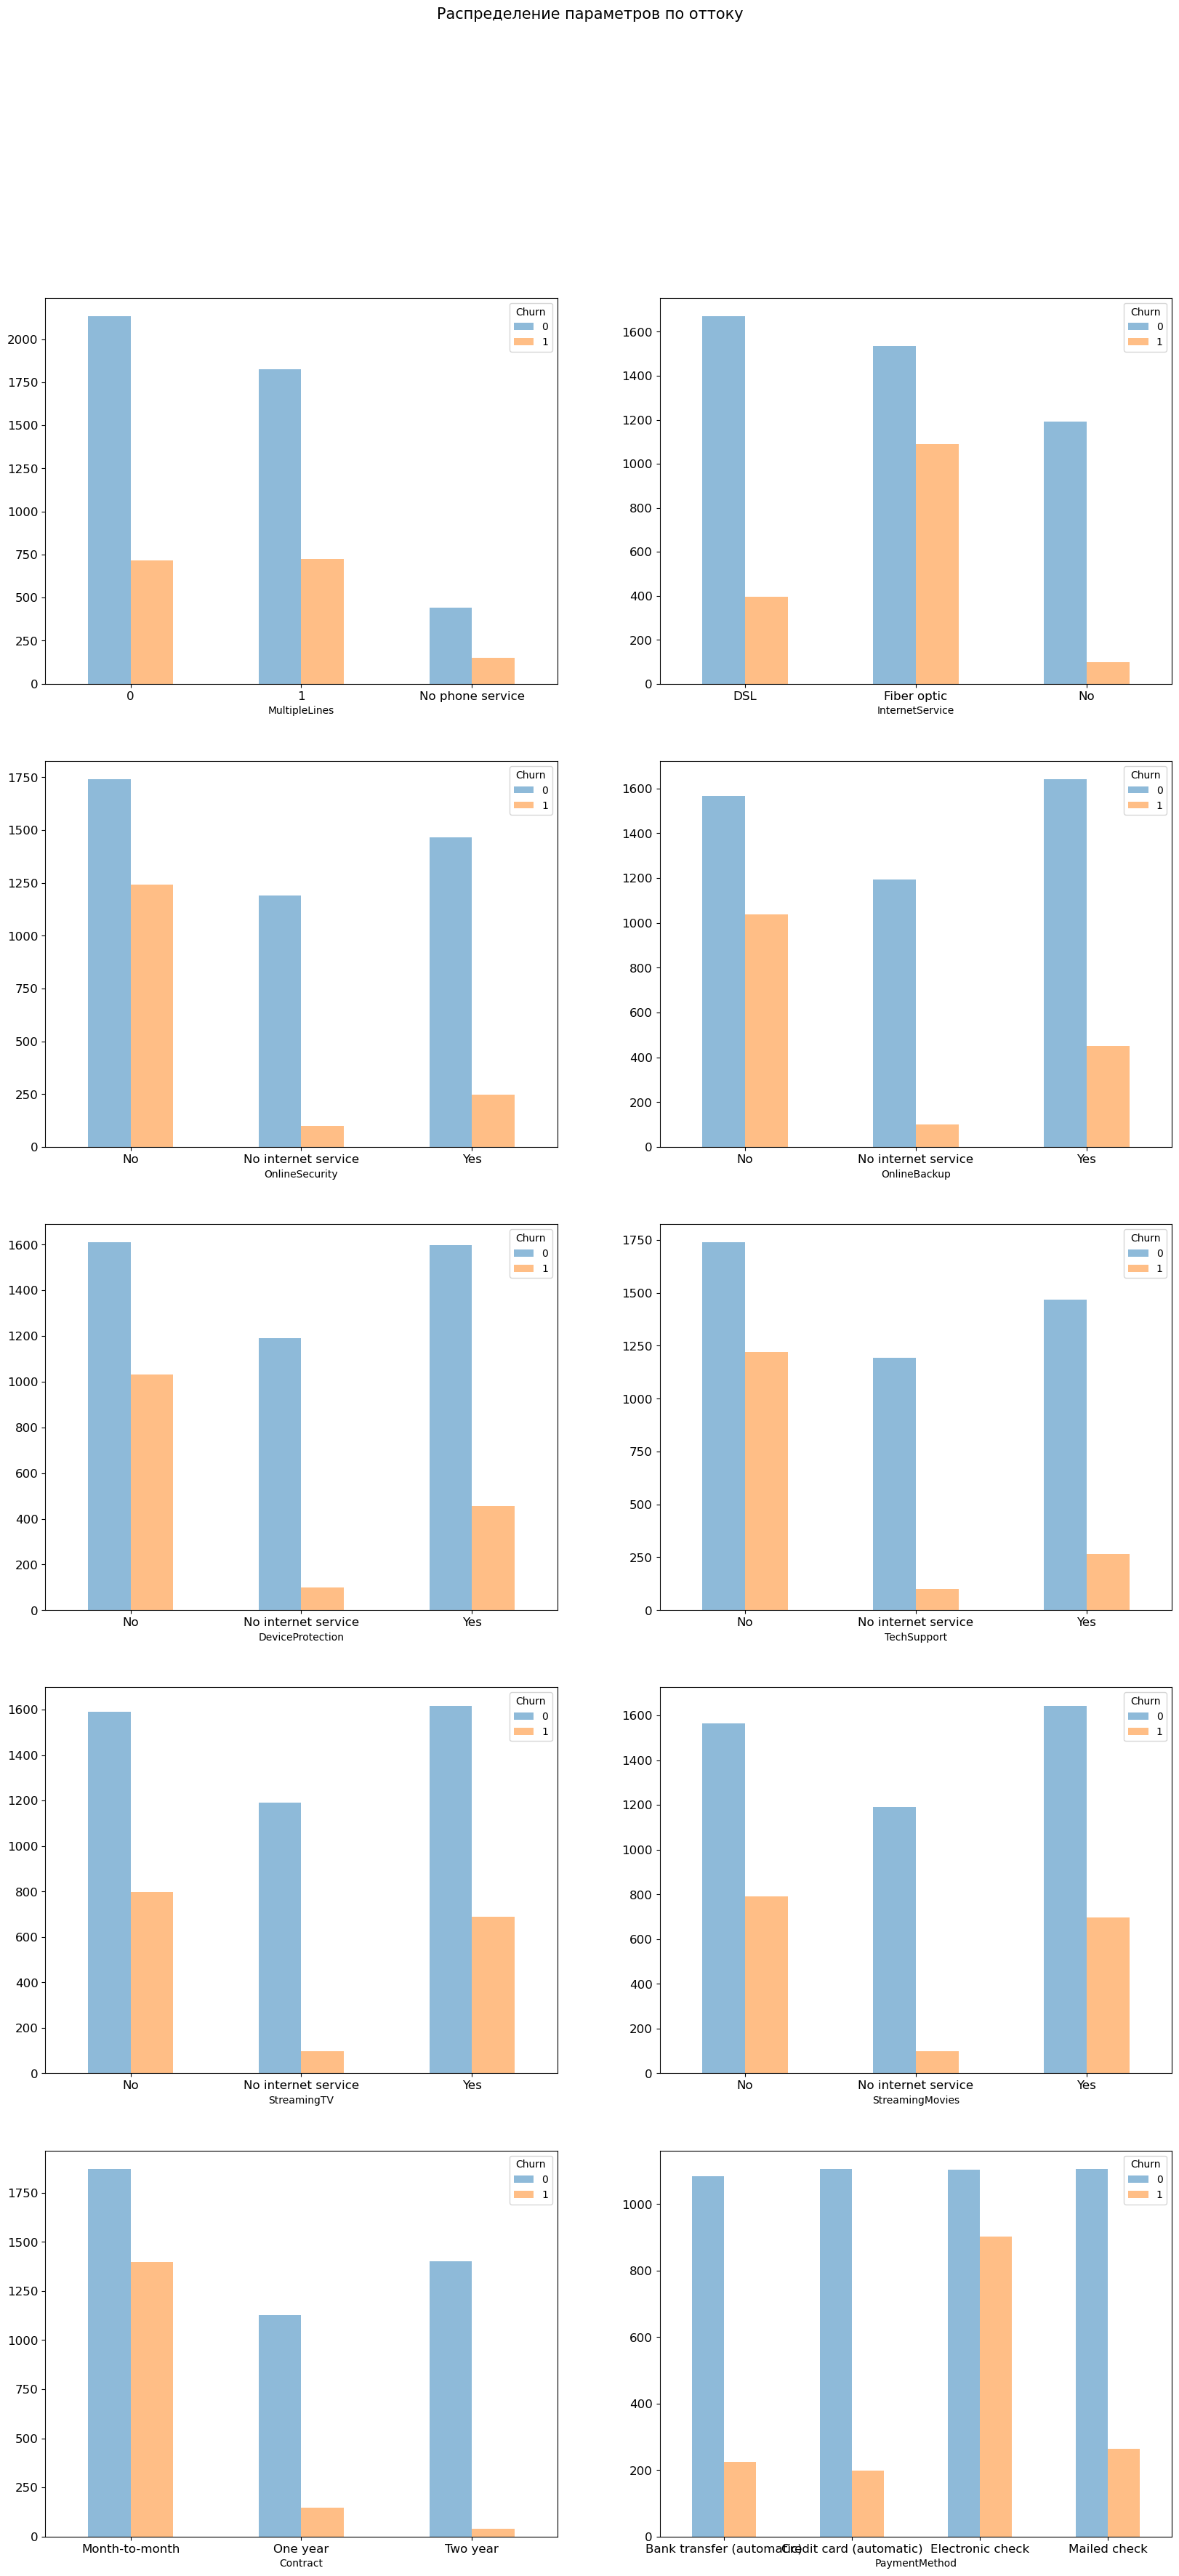

In [43]:
InternetService_list = ['MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                        'TechSupport', 'StreamingTV', 'StreamingMovies','Contract', 'PaymentMethod']
plot_bar(InternetService_list)

- `InternetService` - Среди Интернет-провайдер клиента большой отток у `Fiber optic` выше чем потери цифровой абонентской линии
- Среди пользователей, которые не пользуются онлайн услугами отток больше. По графикам `OnlineSecurity` и `OnlineBackup` - это видно.
- Так же среди клиентов, которые не пользуются дополнительными услугами большой отток `DeviceProtection` и `TechSupport`.
- Клиенты у которых короткие контракты, продлевающие из месяца в месяц, имеют большое количество оттока
- `StreamingTV` – подключена ли услуга стримингового телевидения `StreamingMovies` – подключена ли услуга стримингового кинотеатра не влияет на отток клиентов 
- `MultipleLines` – подключены ли несколько телефонных линий- нет зависимости оттока по данному показателю

**Рассмотрим связь бинарных признаков с оттоком клиентов.**

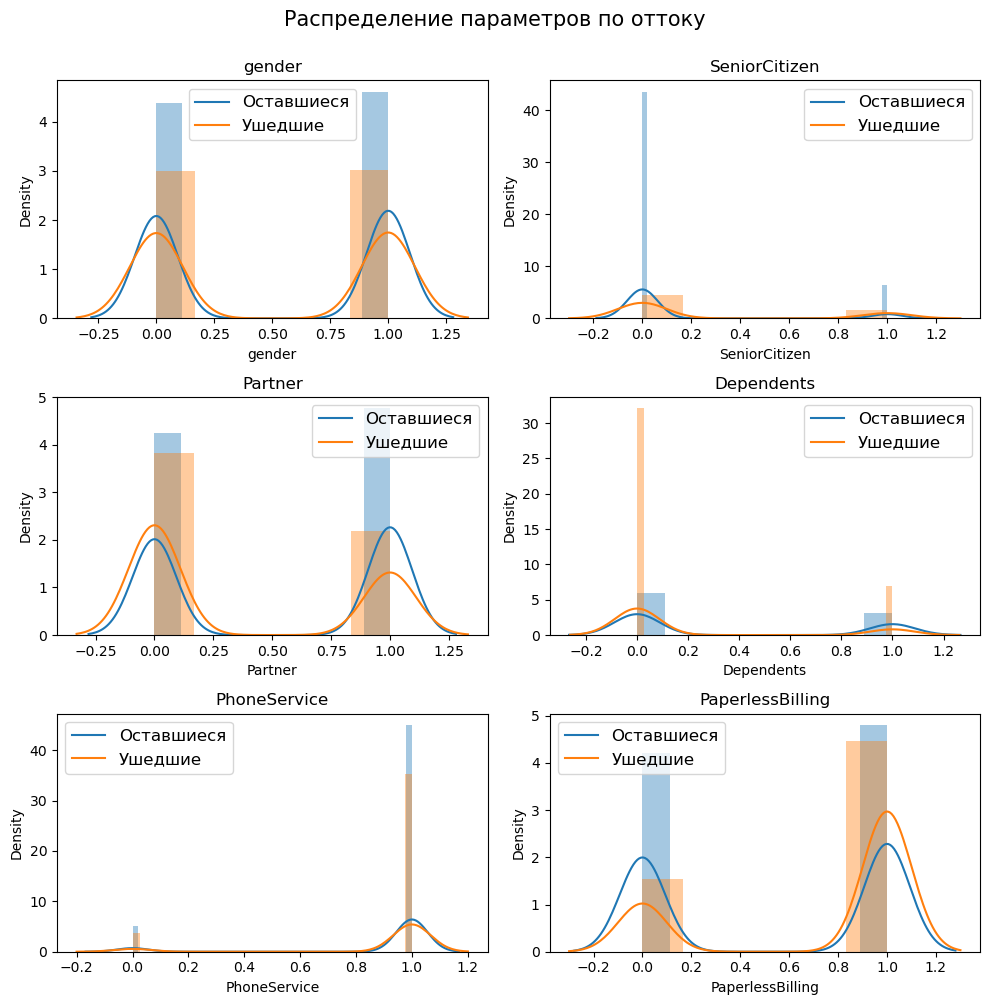

In [44]:
research = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService','PaperlessBilling']
# число рядов и столбцов в сетке графиков
col_count, row_count = 2, 3
# размер графиков
plt.figure(figsize = (10, 10))

# положение графиков в сетке, i+1 порядковый номер графика
for i, j in enumerate(research):
    for churn in df['Churn'].unique():
        current = df.query('Churn == @churn')
        sns.distplot(current[j], ax = plt.subplot(row_count, col_count, i+1))
    
    # подзаголовки на каждый график
    plt.title(j)
    
    # легенды на каждый график
    plt.legend(labels=['Оставшиеся', 'Ушедшие'], fontsize = 12)

# название
plt.suptitle('Распределение параметров по оттоку', y = 1, fontsize = 15)
# настройка подзаголовков
plt.tight_layout()
plt.show()

Чаще попадают в отток:
- Люди у которых нет партнёра `Partner` 
- Если у клиента нет иждивенцев `Dependents`
- Среди пользователей, которые пользуются электронными чеками `PaperlessBilling`  

**Анализ количественных признаков**

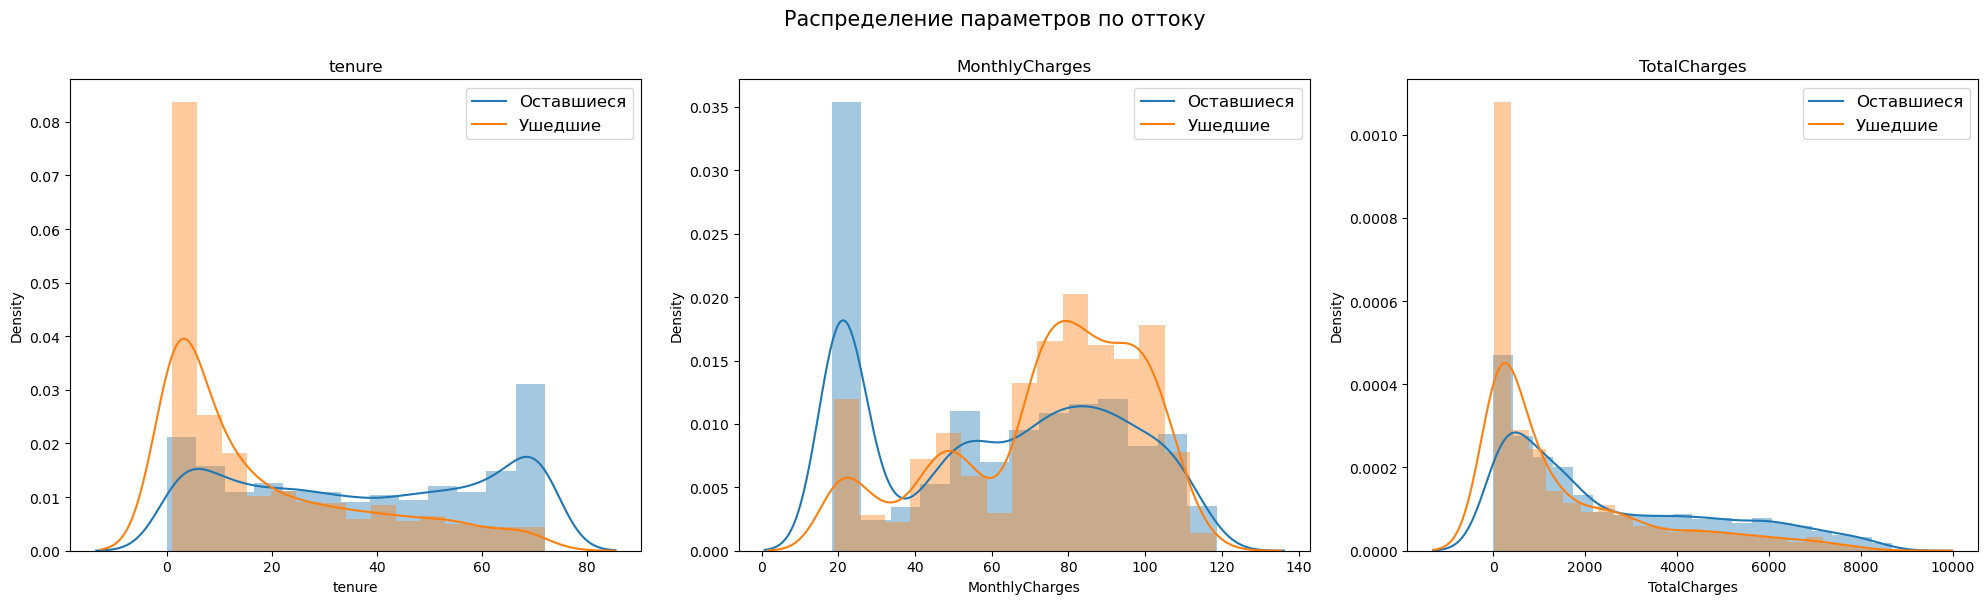

In [46]:
research = ['tenure', 'MonthlyCharges', 'TotalCharges']
# число рядов и столбцов в сетке графиков
col_count, row_count = 3, 1
# размер графиков
plt.figure(figsize = (20, 6))

# положение графиков в сетке, i+1 порядковый номер графика
for i, j in enumerate(research):
    for churn in df['Churn'].unique():
        current = df.query('Churn == @churn')
        sns.distplot(current[j], ax = plt.subplot(row_count, col_count, i+1))
    
    # подзаголовки на каждый график
    plt.title(j)
    
    # легенды на каждый график
    plt.legend(labels=['Оставшиеся', 'Ушедшие'], fontsize = 12)

# название
plt.suptitle('Распределение параметров по оттоку', y = 1, fontsize = 15)
# настройка подзаголовков
plt.tight_layout()
plt.show()

Из полученных диаграмм видно, что признаки `Tenure`, `MonthlyCharges`, `TotalCharges` имеют характер распределения близкий к нормальному:
- признаки `Tenure` и `TotalCharges` представлены усеченной формой распределения, с резким снижением частот;
- признак `MonthlyCharges` представлен бимодальной гистограммой, что возможно свидетельствует о смешении двух различных категорий клиентов.
- Кроме того, в признаке `Tenure` прослеживается четкая зависимость между увеличением количества месяцев, на протяжении которых человек является клиентом, и уменьшением оттока клиентов. Также присутствует обратная связь между размером ежемесячного платежа и оттоком.

Воспользуемся бинарным кодированием (one-hot encoding) к категориальным значениям. Это позволит более точно определить корреляцию между признаками

In [47]:
data = df.copy()
# Удаление признаков из датасета, которые никак не влияют на отток 
data= data.drop(columns={'customerID','StreamingTV','StreamingMovies', 'MultipleLines'})
# Классифицированная переменная Преобразование в переменные переменные, one_hot код
data = pd.get_dummies(data, columns=[ 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport',
                                   'Contract','PaymentMethod'])
data.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
1869       1              0        1           1      72             1   
4528       0              0        0           0      44             1   
6344       0              1        1           0      38             1   
6739       1              0        0           0       4             1   
432        1              0        0           0       2             1   

      PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
1869                 0           24.10       1734.65      0  ...   
4528                 1           88.15       3973.20      0  ...   
6344                 1           74.95       2869.85      1  ...   
6739                 1           55.90        238.50      0  ...   
432                  0           53.45        119.50      0  ...   

      TechSupport_No  TechSupport_No internet service  TechSupport_Yes  \
1869               0                                1                0   
4528               1                                0                0   
6344               1                                0                0   
6739               1                                0                0   
432                1                                0                0   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
1869                        0                  0                  1   
4528                        1                  0                  0   
6344                        1                  0                  0   
6739                        1                  0                  0   
432                         1                  0                  0   

      PaymentMethod_Bank transfer (automatic)  \
1869                                        0   
4528                                        0   
6344                                        1   
6739                                        0   
432                                         0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
1869                                      1                               0   
4528                                      1                               0   
6344                                      0                               0   
6739                                      0                               1   
432                                       0                               1   

      PaymentMethod_Mailed check  
1869                           0  
4528                           0  
6344                           0  
6739                           0  
432                            0  

[5 rows x 32 columns]

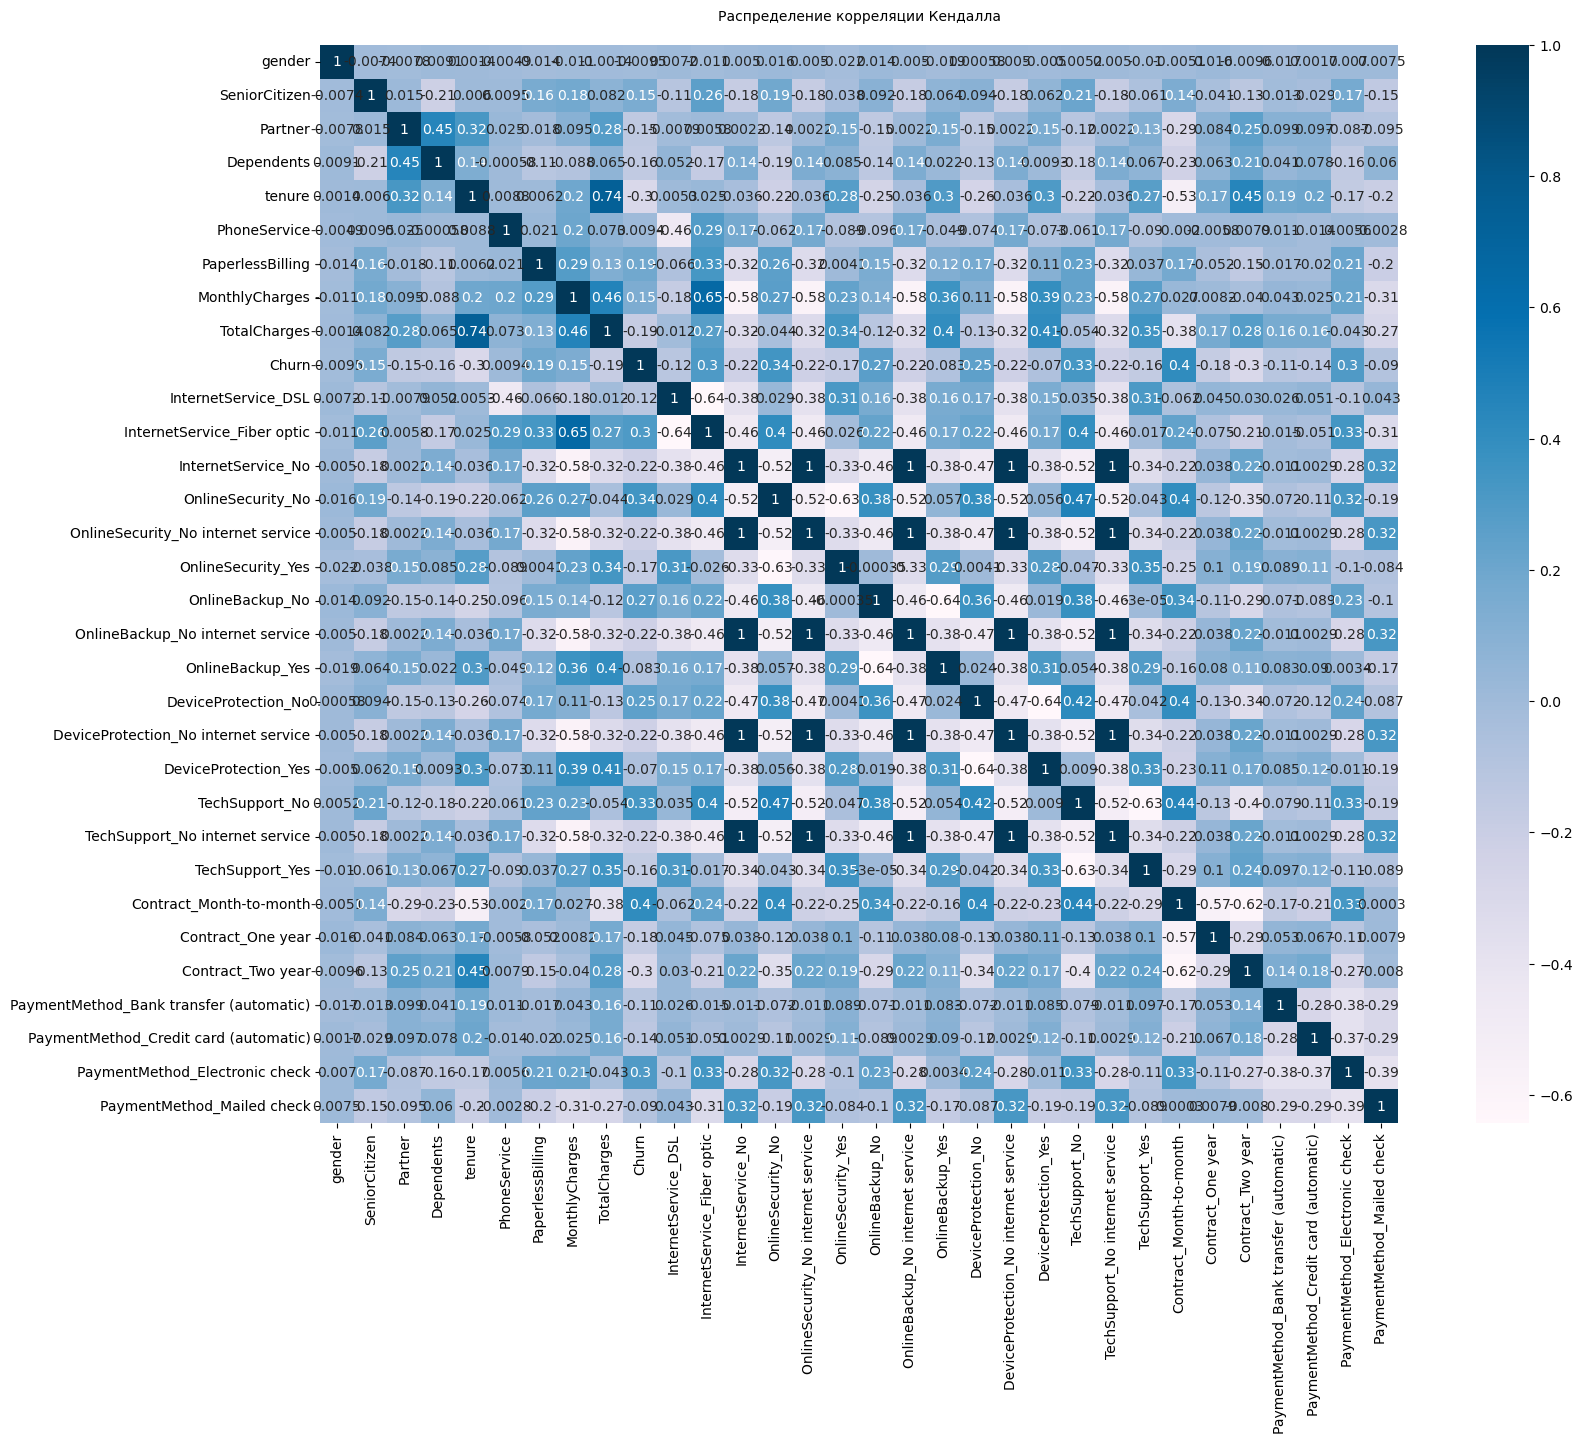

gender  SeniorCitizen   Partner  Dependents    tenure  \
gender         1.000000      -0.007447 -0.007791    0.009083  0.001364   
SeniorCitizen -0.007447       1.000000  0.014867   -0.214233  0.006010   
Partner       -0.007791       0.014867  1.000000    0.449029  0.319869   
Dependents     0.009083      -0.214233  0.449029    1.000000  0.138866   
tenure         0.001364       0.006010  0.319869    0.138866  1.000000   

               PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  \
gender            -0.004913         -0.013990       -0.011297     -0.001437   
SeniorCitizen      0.009464          0.155691        0.179170      0.081616   
Partner            0.024926         -0.018037        0.095366      0.281028   
Dependents        -0.000579         -0.112405       -0.088235      0.064871   
tenure             0.008785          0.006177        0.196187      0.735247   

                  Churn  ...  TechSupport_No  TechSupport_No internet service  \
gender        -0.009548  ...        0.005223                         0.005043   
SeniorCitizen  0.150097  ...        0.207382                        -0.184760   
Partner       -0.146840  ...       -0.115655                         0.002190   
Dependents    -0.160204  ...       -0.179233                         0.143465   
tenure        -0.300508  ...       -0.218658                        -0.035939   

               TechSupport_Yes  Contract_Month-to-month  Contract_One year  \
gender               -0.010327                -0.005120           0.016197   
SeniorCitizen        -0.061045                 0.141796          -0.040934   
Partner               0.125468                -0.285939           0.084043   
Dependents            0.067460                -0.231615           0.062556   
tenure                0.273544                -0.528293           0.173056   

               Contract_Two year  PaymentMethod_Bank transfer (automatic)  \
gender                 -0.009553                                -0.017350   
SeniorCitizen          -0.125914                                -0.013275   
Partner                 0.252479                                 0.099046   
Dependents              0.209799                                 0.041184   
tenure                  0.449440                                 0.191231   

               PaymentMethod_Credit card (automatic)  \
gender                                      0.001695   
SeniorCitizen                              -0.028912   
Partner                                     0.097098   
Dependents                                  0.077927   
tenure                                      0.198050   

               PaymentMethod_Electronic check  PaymentMethod_Mailed check  
gender                               0.007008                    0.007530  
SeniorCitizen                        0.170548                   -0.150208  
Partner                             -0.087224                   -0.094824  
Dependents                          -0.157817                    0.060282  
tenure                              -0.166456                   -0.195667  

[5 rows x 32 columns]

In [48]:
# матрица корреляций
m_corr = data.corr(method='kendall')
plt.figure(figsize = (20, 14))
# тепловая карта с подписями для матрицы корреляций
sns.heatmap(m_corr, annot=True, square=True, cmap= 'PuBu')
plt.title('Распределение корреляции Кендалла\n', fontsize=10)
plt.show()
m_corr.head()

- На матрице корреляции есть как положительные, так и отрицательные сильные связи между признаками
- Тем не менее, при наличии слабых корреляций между признаками и целевой переменной сохраняется возможность прогноза оттока клиентов.
- В графике корреляции четко прослеживается зависимость меду тем что контракт составлен на месяц `Contract_Month-to-month` и онлайн услугами компании и технической поддержкой 
- Положительная корреляция наблюдается между оттоком и 
  - `InternetService_Fiber optic`
  - `OnlineSecurity_No`
  - `TechSupport_No`
  - `Contract_Month-to-month`	
  - `PaymentMethod_Electronic check`	

**Вывод по данным проведённого анализа**

- В результате проведенного анализа были определены какие признаки больше всего могут оказывать влияние на отток клиентов, которые в последующем будут использованы для прогнозирования целевой переменной.
- Одной из основных причин оттока клиентов является отсутствие подписки на услуги безопасности и использование электронных счетов.
- Среди Интернет-провайдер клиента большой отток у Fiber optic выше чем потери цифровой абонентской линии

Также сформулируем гипотезу, которую проверим в ходе работы:
- Между выявленными признаками и оттоком клиентов существует линейная зависимость, которая позволит прогнозировать поведение клиентов с достаточной точностью;

# 3. Построение моделей для прогнозирования оттока

Исходные данные

In [49]:
# разделение данных на признаки (матрица X) и целевую переменную (y)
X = data.drop(columns= 'Churn', axis = 1) # Churn_no столбец не нуждается
Y = data['Churn']

In [50]:
# Посмотрим на балансировку целевого признака
print('Положительных значений -', Y.sum())
print('Отрицательных значений -', Y.count() - Y.sum())

Положительных значений - 1587
Отрицательных значений - 4399


Положительных значений почти в 3 раза меньше чем отрицательных. При делении данных на тестовые и тренировочные применим стратификацию по y.

In [51]:
# разделение модели на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3,  stratify=Y, random_state=17)

Используем отбор признаков чтоб исключить часть переменных, которые возможно будут вносит незначительный вклад в будущую модель. Применим технику RFE (Recursive Feature Elimination) и выбереv значимые признаков для прогнозирования оттока клиентов.

In [52]:
data_vars=data.columns.values.tolist() 
y=['Churn'] 
x=[i for i in data_vars if i not in y] 

In [53]:
# Определение значимых признаков для прогноза целевой переменной
rfe = RFE(RandomForestClassifier(max_depth=3), step=10).fit(data[x], data[y])
print(rfe.support_) 
print(rfe.ranking_) 

[False False False False  True False False  True  True  True  True False
  True False  True  True False False False  True False  True  True False
  True  True  True False False  True False]
[3 3 3 3 1 3 2 1 1 1 1 2 1 2 1 1 2 3 2 1 3 1 1 2 1 1 1 3 3 1 3]


RFE выбрала для нас переменных, которые помечены. Вот что получилось:

In [54]:
# Вывод признаков
cols=data.iloc[:, :-1].columns[rfe.support_].tolist()
cols.remove('Churn') 
print(cols)

['tenure', 'MonthlyCharges', 'TotalCharges', 'InternetService_DSL', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes', 'Contract_Month-to-month', 'Contract_One year', 'PaymentMethod_Credit card (automatic)']


In [55]:
# Удаление слабых признаков из анализа
X_train = X_train[cols]
X_test = X_test[cols]

**Модели машинного обучения**

Рассмотрим ряд базовых алгоритмов классификации с целью определения лучшего алгоритма для прогноза оттока клиентов. В качестве метрики оценки алгоритма выберем показатель площади под кривой ошибок (ROC_AUC), что позволит в целом оценить качество классификации алгоритма.

In [56]:
# Определение базовых алгоритмов машинного обучения
models = [KNeighborsClassifier(), 
          GaussianNB(), 
          SVC(random_state=17), 
          RandomForestClassifier(n_jobs=-1, random_state=17), 
          XGBClassifier(n_jobs=-1, random_state=17),
          LogisticRegression(random_state=17, solver = 'liblinear')]

# Список метрик качества алгоритмов
scores = []

# Поиск подходящего базового алгоритма машинного обучения
for n, model in enumerate(models):
    scores.append(cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=15, n_jobs=-1).mean())

# Список наименований базовых алгоритмов
names = ['Метод К-ближайших соседей', 'Байесовский классификатор', 
         'Метод опорных векторов', 'Случайный лес', 'Градиентный бустинг','Логическая регрессия']

# Вывод метрик качества базовых алгоритмов
pd.DataFrame({'AUC': scores}, index=names)

AUC
Метод К-ближайших соседей  0.737344
Байесовский классификатор  0.805373
Метод опорных векторов     0.785294
Случайный лес              0.796886
Градиентный бустинг        0.806039
Логическая регрессия       0.829911

В ходе построения моделей прогнозирования оттока клиентов были определены 3 модели, показавшие неплохую метрику качества ROC_AUC:
- Логическая регрессия -0.83
- Байесовский классификатор - 0.81;
- Градиентный бустинг - 0.81;

Учитывая, что основной задачей является прогноз ухода клиентов, в последующем выполним расчет и сравнение оценок моделей по метрике "полнота" (Recall). Данная метрика позволит свести к минимуму ложноотрицательные прогнозы и не упустить клиентов, которые на самом деле могут уйти.

Поскольку в области принятия решений предпочтительнее опираться на вероятность, также определим значения вероятностей оттока клиентов. Предсказание вероятности ухода позволит понять к какому из клиентов следует обратиться в первую очередь, а к кому в последнюю.

# 4. Сравнение качества моделей 

**XGBoost Градиентный бустинг**

In [57]:
xgb_model = XGBClassifier(n_jobs=-1, random_state=17).fit(X_train, y_train)
# Расчет прогноза моделей
xgb_pred = xgb_model.predict(X_test)

**LogisticRegression Логистическая регрессия**

In [58]:
log_model = LogisticRegression(random_state=17, solver = 'liblinear').fit(X_train, y_train)
# Расчет прогноза моделей
log_pred = log_model.predict(X_test)
#y_proba_log = log_model.predict_proba(X_test)

**GaussianNB Байесовский классификатор**

In [59]:
gnb_model = GaussianNB().fit(X_train, y_train)
# Расчет прогноза моделей
gnb_pred = gnb_model.predict(X_test)

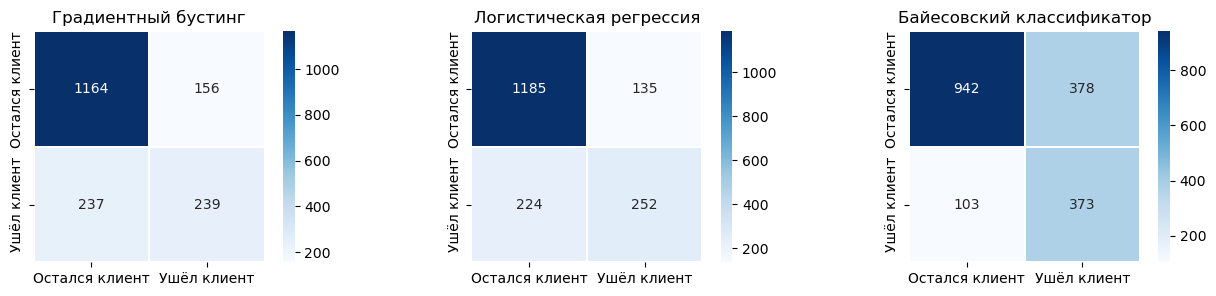

In [60]:
# Определение размера диаграмм
fig, axes = plt.subplots(1, 3, figsize=(16, 3))

# Список целевых переменных предсказанных моделями
predicts = [xgb_pred, log_pred, gnb_pred]

# Список наименований моделей
name_models = ['Градиентный бустинг', 'Логистическая регрессия', 'Байесовский классификатор']

# Вывод матриц ошибок
for ax, y_predict, name in zip(axes.flat, predicts, name_models):
    sns.heatmap(
        confusion_matrix(y_test, y_predict), cmap='Blues', square=True, 
        linewidths=0.1, linecolor='white', annot=True, fmt='d', 
        xticklabels=['Остался клиент', 'Ушёл клиент'], 
        yticklabels=['Остался клиент', 'Ушёл клиент'],
        ax=ax
    ).set_title(name)

# Вывод диаграмм
plt.show()

- Из результатов сравнения моделей видно, что `Байесовский классификатор` превосходит остальные алгоритмы по показателю полноты `Recall`. 
- При 476 фактических случаев ухода клиентов, 376 оказались правильными. 
- По показателю точности `Precision` на первом месте `Логическая регрессия`. При 350 спрогнозированных случаях оттока, 230 правильные.
- Хотя по показателю полноты `Байесовский классификатор` превосходит `Градиентный бустинг` и `Логическую регрессию`, по точности им уступает. Если не затрагивать вопрос интерпретируемости полученных результатов, выбор очевиден - `Байесовский классификатор`, поскольку производит лучший охват в прогнозе оттока клиентов.

Рассмотрим, как интерпретируются полученные результаты выбранных моделей: Байесовского классификатора, Градиентного бустинга и Логическая регрессия. Также определим лучшую модель для выявления клиентов, которые не собираются продлевать контракт.

**Вероятность оттока**

Определим функцию сравнения прогнозных вероятностей оттока клиентов, полученных с помощью модели машинного обучения, с фактическими исходами.

In [61]:
def predict_probabilities(model, X, y):
    # Определение вероятности исхода для всех клиентов
    predict_proba = model.predict_proba(X)
    # Выборка вероятностей для ушедших клиентов с
    # округлением значений для укрупненного подсчета
    predict_churn = np.round(predict_proba[:, 1], 1)
    # Подсчет количества вероятностей ушедших клиентов
    value_churn = pd.value_counts(predict_churn)
    # Выборка истинных исходов ушедших клиентов
    true_churn = y==1
    # Определение доли истинных исходов ушедших клиентов
    # или реальная вероятность ухода клиента
    true_proba = [np.mean(true_churn[predict_churn==value]) for value in value_churn.index]    
    # Объединение вероятностей в датафрейм
    result_df = pd.concat([value_churn.reset_index(), pd.Series(true_proba)], axis=1)
    # Указание названий столбцов и сортировка значений в датафрейме
    result_df.columns = ['Прогнозная вероятность', 'Кол. ушедших', 'Истинная вероятность']
    result_df = result_df.sort_values('Прогнозная вероятность', ascending=False).reset_index(drop=True)
    # Возвращение датафрейма
    return result_df

In [62]:
# Вывод вероятностей ухода клиентов
predict_probabilities(gnb_model, X_test, y_test)

Прогнозная вероятность  Кол. ушедших  Истинная вероятность
0                      1.0           529              0.563327
1                      0.9           102              0.392157
2                      0.8            48              0.291667
3                      0.7            35              0.257143
4                      0.6            25              0.360000
5                      0.5            23              0.260870
6                      0.4            29              0.344828
7                      0.3            15              0.200000
8                      0.2            19              0.157895
9                      0.1            46              0.152174
10                     0.0           925              0.083243

In [63]:
# Вывод вероятностей ухода клиентов
predict_probabilities(xgb_model, X_test, y_test)

Прогнозная вероятность  Кол. ушедших  Истинная вероятность
0                      1.0            24              0.916667
1                      0.9            63              0.746032
2                      0.8            72              0.611111
3                      0.7            93              0.505376
4                      0.6           107              0.542056
5                      0.5            93              0.559140
6                      0.4           133              0.345865
7                      0.3           126              0.309524
8                      0.2           168              0.238095
9                      0.1           291              0.192440
10                     0.0           626              0.039936

In [64]:
# Вывод вероятностей ухода клиентов
predict_probabilities(log_model, X_test, y_test)

Прогнозная вероятность  Кол. ушедших  Истинная вероятность
0                     0.7           170              0.758824
1                     0.6           129              0.604651
2                     0.5           170              0.435294
3                     0.4           140              0.392857
4                     0.3           178              0.269663
5                     0.2           272              0.176471
6                     0.1           371              0.099730
7                     0.0           366              0.019126

- Из полученных результатов прогноза оттока клиентов можно сказать, что Градиентный бустинг показывает более близкую вероятность ухода клиента к фактическому исходу, чем остальные. 
- Поскольку вероятность оттока клиентов позволяет оценить не только степень уверенности потери клиента, но и понять с какой группой клиентов следует работать в первую очередь, допускаю, что из трех выбранных моделей для Компании выгоднее смотрится Градиентный бустинг.

**Вывод**

Подводя итоги по проекту можно сделать следующие выводы:

Есть портрет клиента по среднестатистическим данным
- Медианный месячный платеж среди всех абонентов составляет 70.4 у.е.
- Большинство клиентов - мужчины.
- Медианное количество месяцев подписки составляет чуть больше 29. Максимальное - 72.
- Большинство клиентов не состоят в браке, а также не имеют иждивенцев.
- Интернет провайдером большинства клиентов является `Fiber optic`.
- Большинство клиентов не пользуются дополнительными услугами.
- Больше половины клиентов имеют тип контракта `Month-to-month`.
- Большая часть клиентов использует безбумажный биллинг.
- `Electronic check` является приоритетным способом оплаты.

После построения матрицы корреляции стало понятно по каким причинам у нас отток клиентов в фирме 
- В графике корреляции четко прослеживается зависимость меду тем что контракт составлен на месяц `Contract_Month-to-month` и онлайн услугами компании и технической поддержкой 
- Для решения проблемы стоить увеличить срок обслуживания клиентов на более длительный и подключать к онлайн услугам клиентов с первых дней пользования.
- Раннее выдвинутое предположение о высокой степени связи признаков `Tenure`, `MonthlyCharges`, `TotalCharges` с целевой переменной подтвердилось. Так как данные признаки были определены как значимые и вошли в модель прогноза оттока
- Так же подтверждается гипотеза что пол, телефонные и телевизионные услуги никак не влияют на отток
- Предсказывая отток, компании важно не упустить клиентов, которые на самом деле уйдут, то есть свести к минимуму ложноотрицательные прогнозы моделей и ориентироваться на метрику полноты (Recall). Наивный байесовский классификатор превзошел остальные модели. По показателю полноты данную модель будем считать лучшей;
